## **Challenge Two: Build a Data Product**  

# Complaint Type Prediction with Transformer Deep Learning Model

Note: This notebook uses the **class balanced** data created from the NYC 311 Dataset in the notebook **Ezoic-Challenge-Two-Data-Preprocessing-2**

In [ ]:
# !pip install simpletransformers

In [3]:
# from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import random
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
# Reading the csv from pandas
df = pd.read_csv('nyc_311_balanced.csv', index_col=[0])

In [5]:
df.head()

,complaint_type,text,labels
2335,SEWER,snatch catchment basin clogged flooding,20
2001,NOISE,Sound equipment,15
254,FOOD ESTABLISHMENT,plumbing,9
3,PLUMBING,water leaks,17
2132,TREE,cedar tree leaning proudly uprooted,23


In [6]:
# creating a dict to map label to ids
category_id_df = df[['complaint_type', 'labels']].drop_duplicates()
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['labels', 'complaint_type']].values)

In [7]:
id_to_category

{0: 'AIR QUALITY',
 1: 'CONSTRUCTION',
 2: 'CONSTRUCTION SAFETY ENFORCEMENT',
 3: 'CONSUMER COMPLAINT',
 4: 'DCA / DOH NEW LICENSE APPLICATION REQUEST',
 5: 'DOF PARKING - PAYMENT ISSUE',
 6: 'DOF PROPERTY - PAYMENT ISSUE',
 7: 'DOF PROPERTY - REDUCTION ISSUE',
 8: 'ELECTRICAL',
 9: 'FOOD ESTABLISHMENT',
 10: 'HAZARDOUS MATERIALS',
 11: 'HIGHWAY CONDITION',
 12: 'HPD LITERATURE REQUEST',
 13: 'ILLEGAL PARKING',
 14: 'MAINTENANCE OR FACILITY',
 15: 'NOISE',
 16: 'OTHER',
 17: 'PLUMBING',
 18: 'SANITATION',
 19: 'SCRIE',
 20: 'SEWER',
 21: 'STREET CONDITION',
 22: 'TRAFFIC',
 23: 'TREE',
 24: 'VIOLATION OF PARK RULES',
 25: 'WATER CONSERVATION'}

In [46]:
# total label count. Adding 1 for 0 index
label_count = df['labels'].nunique() + 1 
label_count

27

In [47]:
# Preparing data in the format Transformer model requires
df['text'] = df['text'].astype(str)

# Splitting data for train-val-test

In [48]:
df_train, df_test = train_test_split(df, stratify = df['labels'], test_size=0.1, random_state = 42)
df_train, df_val = train_test_split(df_train, test_size=0.1, random_state = 42)

# Model Arguements and Hyperparameters

In [ ]:
model_args = ClassificationArgs()

"""
epochs: The number of  of complete passes through the training dataset.
batch_size: The number of samples processed before the model is updated.
max_seq_length: The maximum length of the input data sample.
learning_rate: Controls how much to change the model in response to the 
               estimated error each time the model weights are updated
"""
model_args.num_train_epochs = 5

model_args.train_batch_size = 8

model_args.max_seq_length = 512

model_args.learning_rate = 1e-5

# default parameter values, can be changed if needed
model_args.evaluate_during_training = True
model_args.evaluate_during_training_silent = False
model_args.evaluate_during_training_steps = -1
model_args.save_eval_checkpoints = False
model_args.save_model_every_epoch = False
model_args.eval_batch_size = 32
model_args.manual_seed = 4
model_args.multiprocessing_chunksize = 5000
model_args.no_cache = True
model_args.overwrite_output_dir = True
model_args.reprocess_input_data = True


# Defining the Model

In [ ]:
"""
RoBERTa is a transformers model pretrained on a large corpus of English data.
The model I have used is pulled from HuggingFace.
"""

model = ClassificationModel(
    'roberta', 
    'roberta-base', 
    num_labels = label_count, 
    use_cuda = True, 
    args = model_args
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

# Model Training

In [ ]:
model.train_model(
    df_train,
    eval_df = df_val,
    accuracy=lambda truth, predictions: accuracy_score(truth, [round(p) for p in predictions]),
)

  0%|          | 0/2054 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/8 [00:00<?, ?it/s]

(1285,
 defaultdict(list,
             {'global_step': [257, 514, 771, 1028, 1285],
              'train_loss': [2.7747395038604736,
               1.9558919668197632,
               1.6052652597427368,
               2.3854167461395264,
               1.896240234375],
              'mcc': [0.42536504568288785,
               0.5645322198390277,
               0.6487749266483444,
               0.7040231575451977,
               0.7301758702405536],
              'accuracy': [0.4410480349344978,
               0.5764192139737991,
               0.6593886462882096,
               0.7117903930131004,
               0.7379912663755459],
              'eval_loss': [2.61295622587204,
               1.792385295033455,
               1.456589698791504,
               1.2766506224870682,
               1.2165058106184006]}))

# Model Evaluation on Unseen Data

I have chosen the Matthews correlation coefficient (MCC) as the metric to evaluate the model.  
MCC takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.  
The MCC is in essence a correlation coefficient value between -1 and +1.

In [49]:
result, model_outputs, wrong_predictions = model.eval_model(df_test)

  0%|          | 0/254 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/8 [00:00<?, ?it/s]

In [58]:
mcc_score = result['mcc']
print(mcc_score)

0.7186242990519334


The model has got an MCC Score of 0.71.

Here are some sample predictions made by the model on the test set.

In [56]:
cols = ['text', 'predicted_label', 'label_id']
rows = []
for i, text in enumerate(df_test['text']):
  predicted_label_id = model_outputs[i].argmax().item()
  predicted_label =  id_to_category[predicted_label_id]
  rows.append([text, predicted_label, predicted_label_id])

test_results = pd.DataFrame(rows, columns=cols)
test_results.sample(n = 10)

,text,predicted_label,label_id
153,glassware hanging,OTHER,16
33,posted parking sign violation,ILLEGAL PARKING,13
204,green area,MAINTENANCE OR FACILITY,14
48,double sided parked lane blocking vehicle,ILLEGAL PARKING,13
58,conduit,TRAFFIC,22
51,parking permit require improper wheelchair use,ILLEGAL PARKING,13
27,posted,TRAFFIC,22
76,water low pressure,PLUMBING,17
167,bbs failure,STREET CONDITION,21
98,status pv refund,DOF PROPERTY - PAYMENT ISSUE,6


The heatmap plotted below shows the **Precison**, **Recall** and **F1-Score** of the Model on all the classes.

[Text(0.5, 0, 'precision'), Text(1.5, 0, 'recall'), Text(2.5, 0, 'f1-score')]

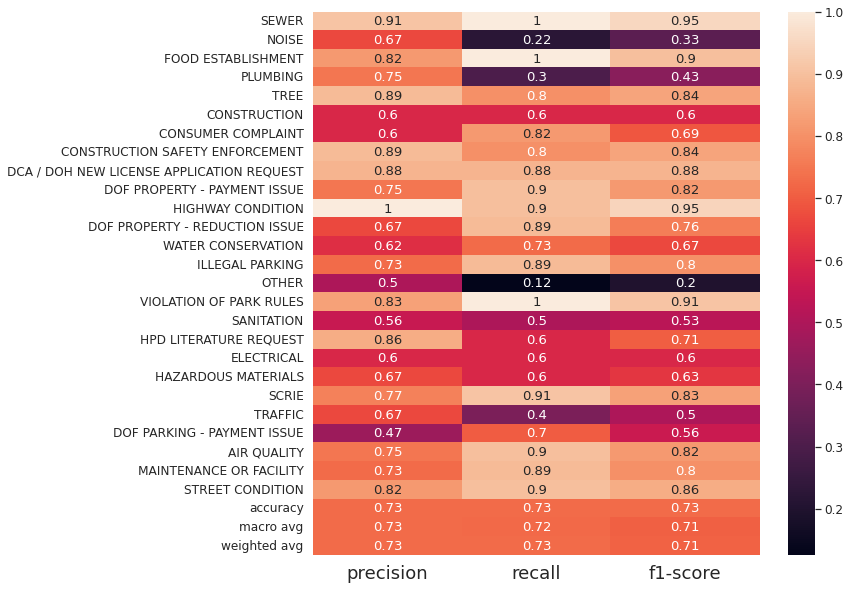

In [37]:
y_test = df_test['labels']
y_pred = test_results['label_id']

clf_report = metrics.classification_report(y_test,
                                   y_pred,
                                   target_names=df['complaint_type'].unique(),
                                   output_dict=True)
plt.figure(figsize=(10,10))
sns.set(font_scale = 1.1)
res = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
res.set_xticklabels(res.get_xmajorticklabels(), size = 18)

Confusion Matrix of the Model

Text(0.5, 1.0, 'CONFUSION MATRIX - SIMPLE TRANSFORMERS')

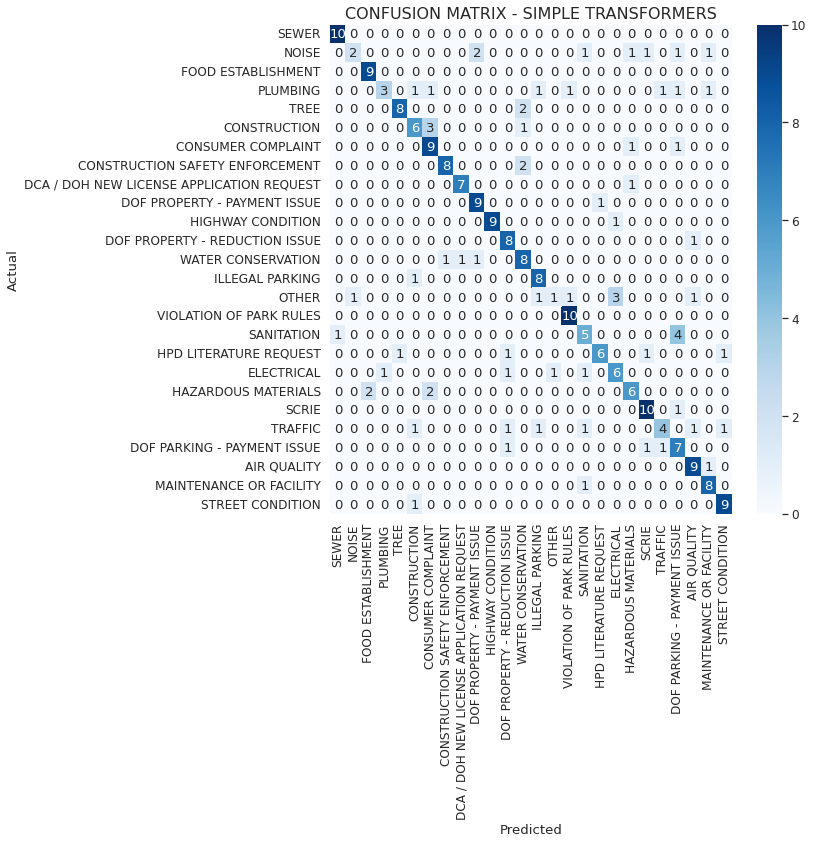

In [38]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.complaint_type.values, 
            yticklabels=category_id_df.complaint_type.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - SIMPLE TRANSFORMERS", size=16)

Sample Test

In [42]:
# testing with sample complaint
prediction, raw_outputs = model.predict(['heater not working'])
id_to_category[prediction[0]]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

'ELECTRICAL'

# Future Work

I have trained a transformer model with RoBERTa pretrained model weights and architecture.  

There is still some scope to improve the performance.  

The following things can be done:  
*   Try different model architectures
*   Tune hyperparameters using libraries like Optuna

I am stopping experimentation here due to the time constraint.